# Machine Learning and Computer Vision
## Assigment 2

---

This assignment contains 3 programming exercises. Please review the pdf file for more detail information.


## Problem 1: Sampling and Quantization

In this problem, we intend to study the effects of sampling and quantization on digital images.
Your job is to write a function with the following specifications (you may use loops if necessary):

(i) The function takes one input: the image file name, 'peppers.png'.

(ii) The input image is assumed to be grayscale.

(iii) Sample the image in spatial domain with a sampling 
rate of 10 (your image should be approximately 10 times smaller along width and height, do not use any numpy functions).

(iv) Do a 5-level uniform quantization of the sampled image so that the bins cover the whole range of grayscale values (0 to 255). You should not use any numpy functions for this.

(v) The function returns one output: the sampled and quantized image.


C:\study\anaconda\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


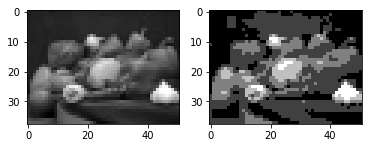

In [4]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt


def sampling_quantization(img):
    height, width = img.shape
    width_sample, height_sample = width//10, height//10
    img_resample = np.zeros((height_sample, width_sample))

    # interpolation method
    # I use the average value as the pixel of of the original 10 * 10 area

    for h in range(height_sample):
        for w in range(width_sample):
            img_resample[h][w] = np.mean(img[h*10:(h+1)*10, w*10:(w+1)*10])

    img_res = img_resample//(256/5)
    return img_resample, img_res

#Import image here
img = imread('peppers.png')

#Sample call and Plotting code
img_resample, img_res = sampling_quantization(img)
plt.subplot(1, 2, 1)
plt.imshow(img_resample,cmap = plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(img_res, cmap = plt.get_cmap('gray'))
plt.show()



## Problem 2 Image shift
Shifting an image x of size (n1, n2) in a direction (k, l) consists in creating a new image xshifted of size
(n1, n2) such that

<img src="markdown/fig1.png">

In practice, boundary conditions should be considered for pixels (i, j) such that (i + k, j + l) not equal to [0, n1-1] x [0, n2-1]. 

A typical example is to consider periodical boundary conditions such that

<img src="markdown/fig2.png">

Create in imshift function implementing the shifting of an image x in periodical boundary, such as the following image(b) Shifted in the direction (k,l) by (+100,-50):
<img src="markdown/fig3.png">

Hint: First write it using loops, and next try to get rid of the loops.

C:\study\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\study\anaconda\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


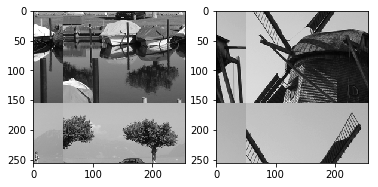

In [5]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt

def imshift(x, k, l):
    height, width = x.shape
    res = np.zeros((height, width))
    for h in range(height):
        for w in range(width):
            res[h,w] = x[(h+k) % height, (w+l) % width]  # consider periodical boundary conditions
    return res


#Sample call and Plotting code
#“lake.png” and "windmill.png"

img1 = imread('lake.png')
img2 = imread('windmill.png')

img1 = imshift(img1, 100, -50)
img2 = imshift(img2, 100, -50)

plt.subplot(1, 2, 1)
plt.imshow(img1,cmap = plt.get_cmap('gray'))
plt.subplot(1, 2, 2)
plt.imshow(img2,cmap = plt.get_cmap('gray'))
plt.show()

Check on x = windmill.png and y = lake.png, if this operation is linear, i.e.,
<img src="markdown/fig4.png">
After shifting the image in the direction (k, l), shift it back in the direction ( k,  l). Interpret the results. Which shift is one-to-one?

C:\study\anaconda\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\study\anaconda\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


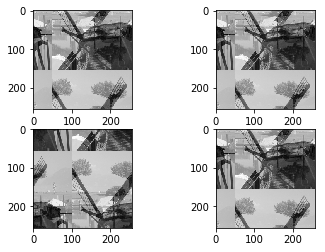

In [8]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt

def imshift(x, k, l):
    height, width = x.shape
    res = np.zeros((height, width))
    for h in range(height):
        for w in range(width):
            res[h,w] = x[(h+k) % height, (w+l) % width]  # consider periodical boundary conditions
    return res


#Sample call and Plotting code
#“lake.png” and "windmill.png"

img1 = imread('windmill.png')
img2 = imread('lake.png')

img_x = imshift(0.6*img1 + 0.4*img2, 100, -50)
img_y = 0.6* imshift(img1 , 100, -50) +  0.4* imshift(img2 , 100, -50)
plt.subplot(2, 2, 1)
plt.imshow(img_x,cmap = plt.get_cmap('gray'))
plt.subplot(2, 2, 2)
plt.imshow(img_y,cmap = plt.get_cmap('gray'))

img_z = imshift(img_x , 100, -50)
img_w = imshift(img_z, -100, 50)
plt.subplot(2, 2, 3)
plt.imshow(img_z,cmap = plt.get_cmap('gray'))
plt.subplot(2, 2, 4)
plt.imshow(img_w,cmap = plt.get_cmap('gray'))
plt.show()


## Problem 3 Convolution
In this problem, we intend to explore and implement 2D convolution.

<img src="markdown/conv.png">

First, Create imkernel function that produces a function handle nu implementing a convolution kernel functions on the finite support (-s1, s1)x(-s2, s2). In this case, we specifies the ’gaussian’ kernel as following.

Create imconvolve_naive function that performs(except around boundaries) the convolution between x and v with four loops.

Create imconvolve_spatial function that performs the convolution between x and v including around boundaries. The idea is to switch the k, l loops with the i, j loops, and then make use of imshift. The final code should read with only two loops. 

Write a script test_imconvolve function that compares the results and the execution times of imconvolve_naive and imconvolve_spatial, give comment on the execution times of two methods. You should have similar result like:
<img src="markdown/fig5.png">




In [1]:
import time
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt


def imkernel(tau, s1, s2):
    w = lambda i, j: np.exp(-(i ** 2 + j ** 2) / (2 * tau ** 2))
    # normalization
    i, j = np.mgrid[-s1:s1, -s2:s2]
    Z = np.sum(w(i, j))
    nu = lambda i, j: w(i, j) / Z * (np.absolute(i) <= s1 & np.absolute(j) <= s2)
    return nu


# Create imconvolve_naive function,
def imconvolve_naive(im, nu, s1, s2):
    (n1, n2) = im.shape
    xconv = np.zeros((n1, n2))
    for h in range(s1,n1-s1):
        for w in range(s1,n2-s2):
            for x in range(-s1, s1+1):
                for y in range(-s2, s2+1):
                    xconv[h,w]=nu(x,y)*im[h+x, w+y]
    return xconv



# Create imconvolve_spatial function
def imconvolve_spatial(im, nu, s1, s2):
    (n1, n2) = im.shape
    xconv = np.zeros((n1, n2))
    for h in range(n1):
        for w in range(n2):
            for x in range(-s1, s1+1):
                for y in range(-s2, s2+1):
                    xconv[h,w]=nu(x,y)*im[(h+x)%n1, (w+y)%n2]
    return xconv


def test_imconvolve():
    tau = 1
    s1 = 4
    s2 = 4
    img = imread('windmill.png')
    t0 = time.time()
    img_con = imconvolve_naive(img, imkernel(tau, s1, s2), s1, s2)
    t1 = time.time()
    img_spa = imconvolve_spatial(img, imkernel(tau, s1,s2), s1, s2)
    t2 = time.time()

    T1 =str(float('%.2f' % (t1-t0)))
    T2 = str(float('%.2f' % (t2-t1)))
    plt.subplot(1, 3, 1)
    plt.title("original image")
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 2)
    plt.title("cost time:"+T1)
    plt.imshow(img_con, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 3)
    plt.title("cost time:"+T2)
    plt.imshow(img_spa, cmap=plt.get_cmap('gray'))
    plt.show()
# Sample call and Plotting code

test_imconvolve()


C:\study\anaconda\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****
In this lession, I learn to use resampling as well as setting the level of gray to images, and I also try to shift the images by using chaging the matrix through numpy.
For the part 3, I still feel confused about the convolution problem. For the problem 3, I am asked to use the imkernel to solve the question, and I tried but find it looks not similary to the standard answer. Besides, I do not understand how to use only two loops to work out.





---
** Submission Instructions**  
Remember to submit you pdf version of this notebook to Gradescope. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX